# Input Data

In [1]:
set.seed(64)

In [2]:
countNA <- function(x=NULL,cutOff=NULL){
  output<-FALSE
  perc<-sum(is.na(x))*100/length(x)
  if(perc>cutOff){output<-TRUE}
  output  
}

In [46]:
# path <- "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/GideHugoRiazAmatoLiu_AntiPD1_train.rds"
# train_pos <- readRDS("/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/GideHugoRiazAmatoLiu_AntiPD1_train_pos.rds")
library("limma")
library("edgeR")
library("caret")

data <- readRDS("/home/jp/ICP_Responders/DataCollectionFormatting/MergeTables/Liu_AntiPD1_train.rds")
nrow(data)

# data already clean
# row_nas <- apply(data,1,function(x){countNA(x, 50)})
# data <- data[-which(row_nas %in% TRUE),]


# expression matrix
rmc <- c("Row.names", "OS", "OS.Event", "RECIST", "Age", "Gender", "Response", "Source")
exp <- data[, -which(colnames(data) %in% rmc)]
exp <- t(exp)
# phenotype
ph <- data[, c("Row.names","Response")]
# ph$src <- gsub("(.).*", "\\1", ph$Source)

ph$src <- "L"

# ph$clr <- "purple"
# # ph[ph$src == "R",]$clr <- "red" 
# # ph[ph$src == "H",]$clr <- "blue"
# # # ph[ph$src == "A",]$clr <- "purple"
# # ph$clr <- "purple"

# head(ph)
# head(exp)

ph$clr_res <- c(rep("green", 60))
ph[ph$Response == 0]$clr_res <- "gray"

[1] 60

# Look for batch effects

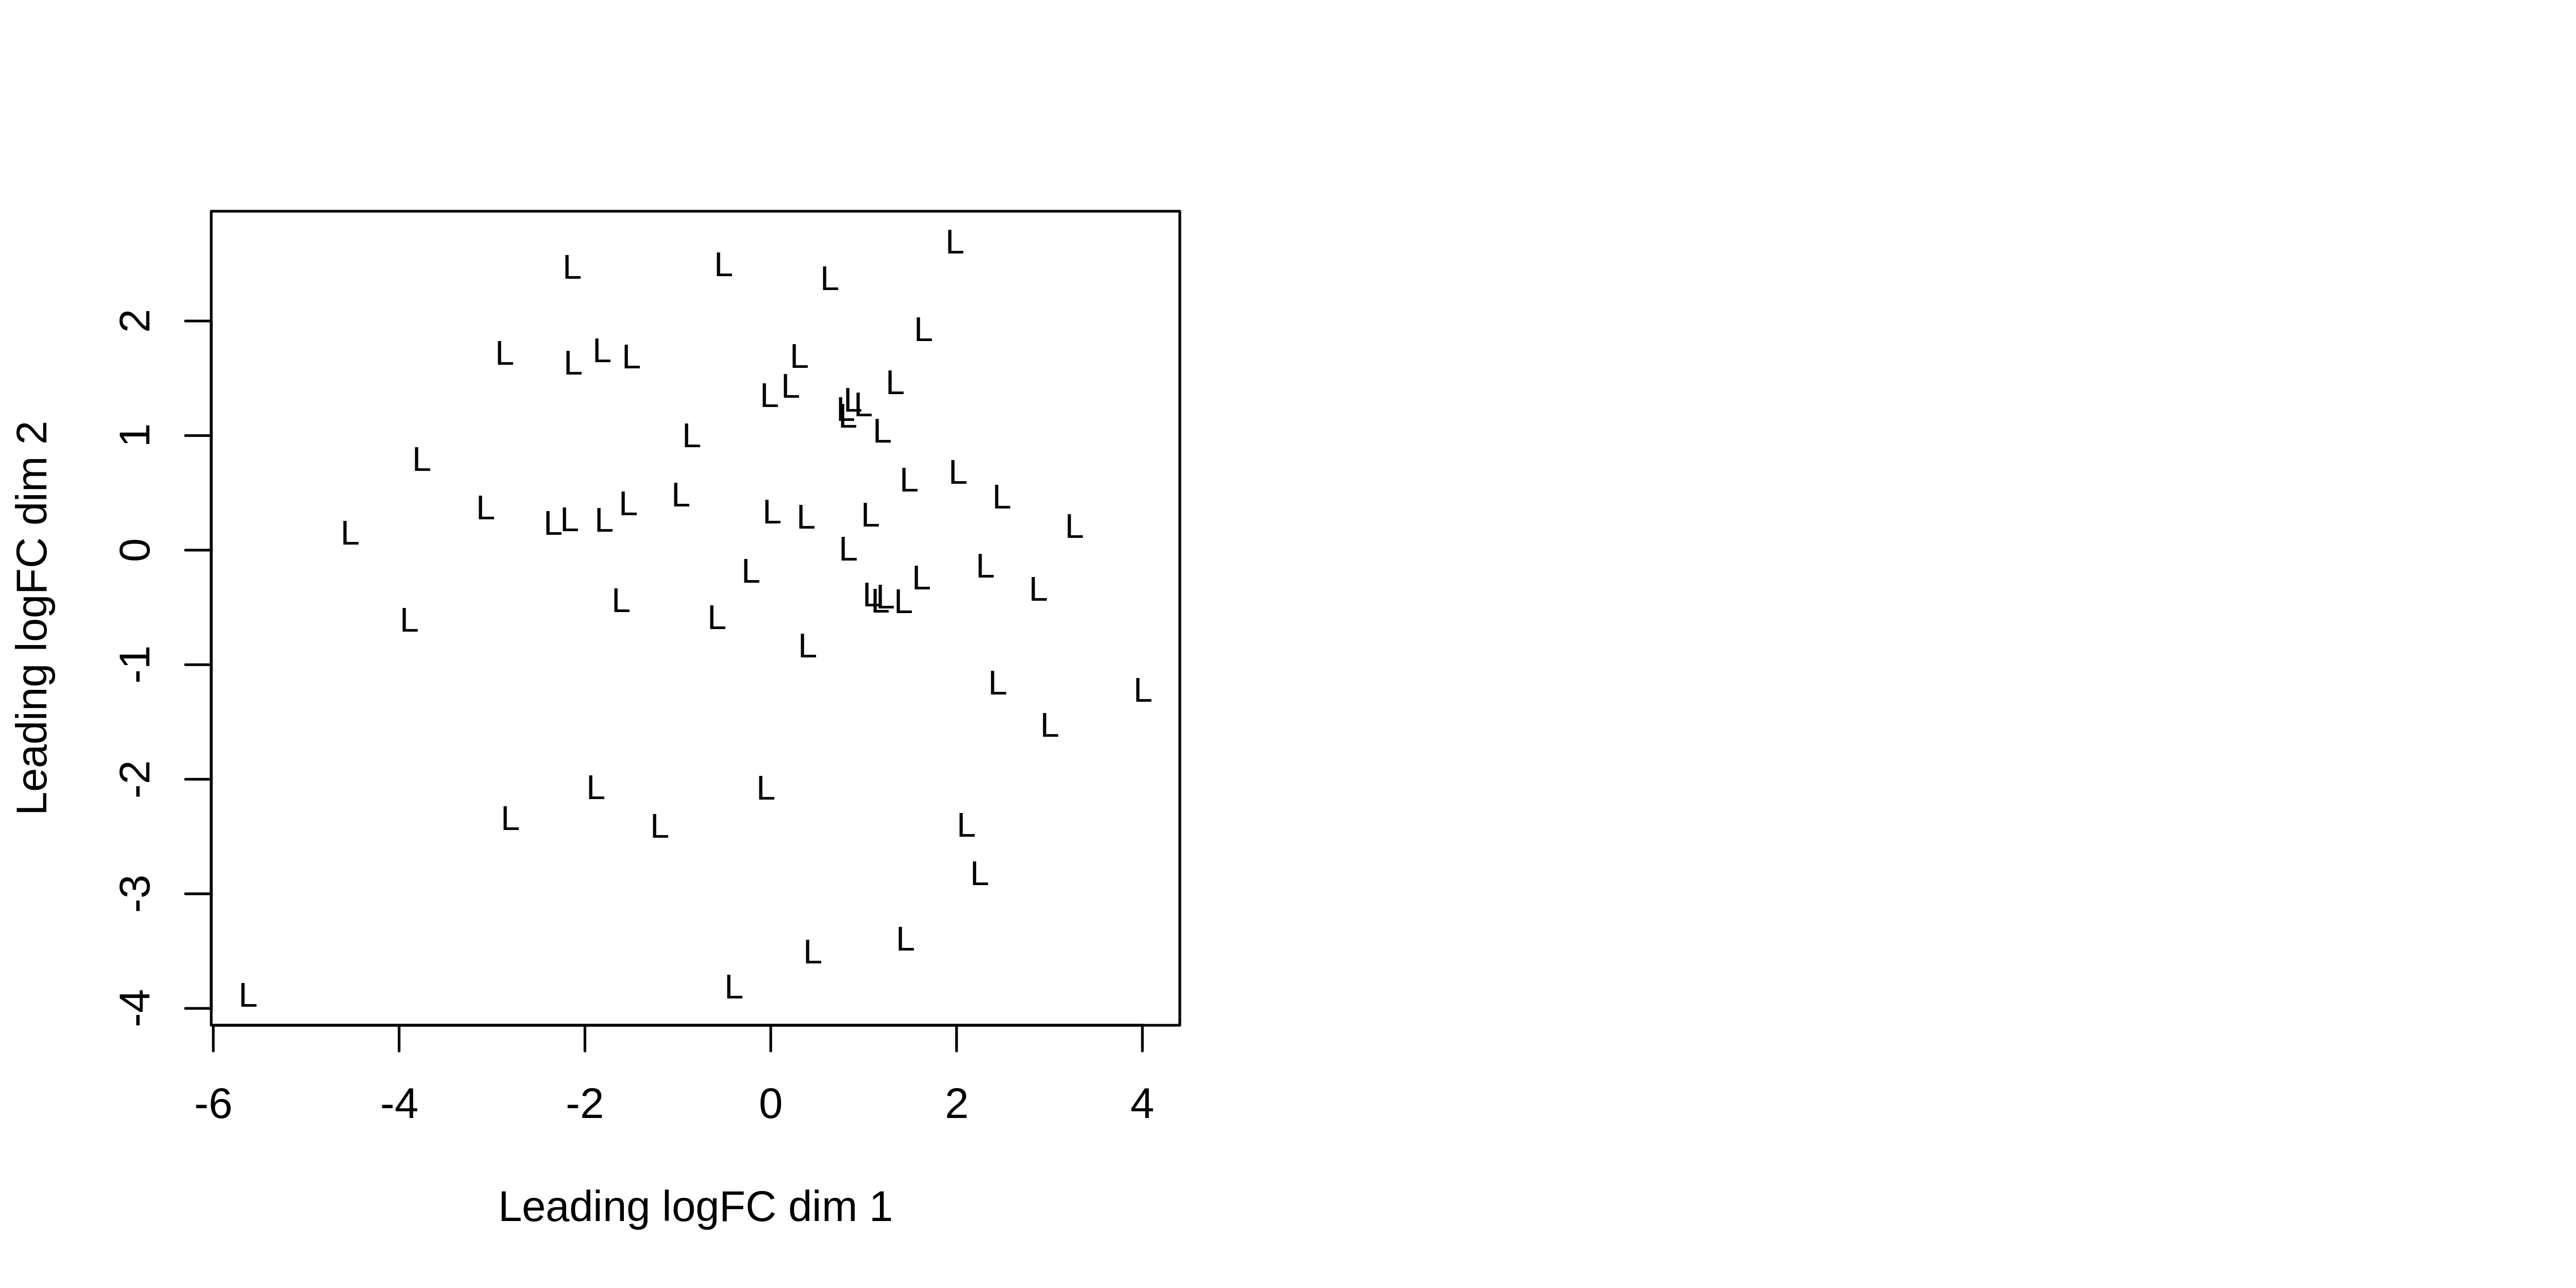

In [47]:
# dge_list <- DGEList(counts=exp, group=as.factor(ph$Source))
options(repr.plot.height=5, repr.plot.width=10, repr.plot.res=500)
par(mfrow=c(1,2))
plotMDS(exp, labels=ph$src, pch=19, cex=0.8)
# plotMDS(exp, labels=as.character(ph), pch=19, col=ph$clr_res, cex=0.8)

In [21]:
ph$Response

ERROR: Error in ph$Response: $ operator is invalid for atomic vectors


# Differential Expression

`TODO:`
STICK TO EBAYES<br>
Use treat/eBayes(0 Response Source as factors)?<br>
Best way to implement design matrix<br>
Rank on P values<br>
Take top 150/500<br>

In [32]:
#eBayes/ treat
# bayes <- eBayes(lin_mod)
# output <- topTable(lin_mod, number=Inf)
design <- model.matrix(~0+as.factor(ph))
lin_mod <- lmFit(exp,design)
lin_mod <- eBayes(lin_mod)
output <- topTable(lin_mod, number=Inf)
ordered_output <- output[order(output$P.Value),]

# ordered_output
nrow(ordered_output[ordered_output$P.Value < 0.05, ])
# ordered_output[ordered_output$P.Value < 0.05, ]

[1] 7728

# Output DiffEx Genes

In [37]:
limma200 <- rownames(ordered_output[ordered_output$P.Value < 0.05, ])[1:200]
saveRDS(limma200, 
        "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/liu_limma200.list.rds")

In [ ]:
length(limma86)

In [ ]:
ordered_output[ordered_output$P.Value < 0.05, ]

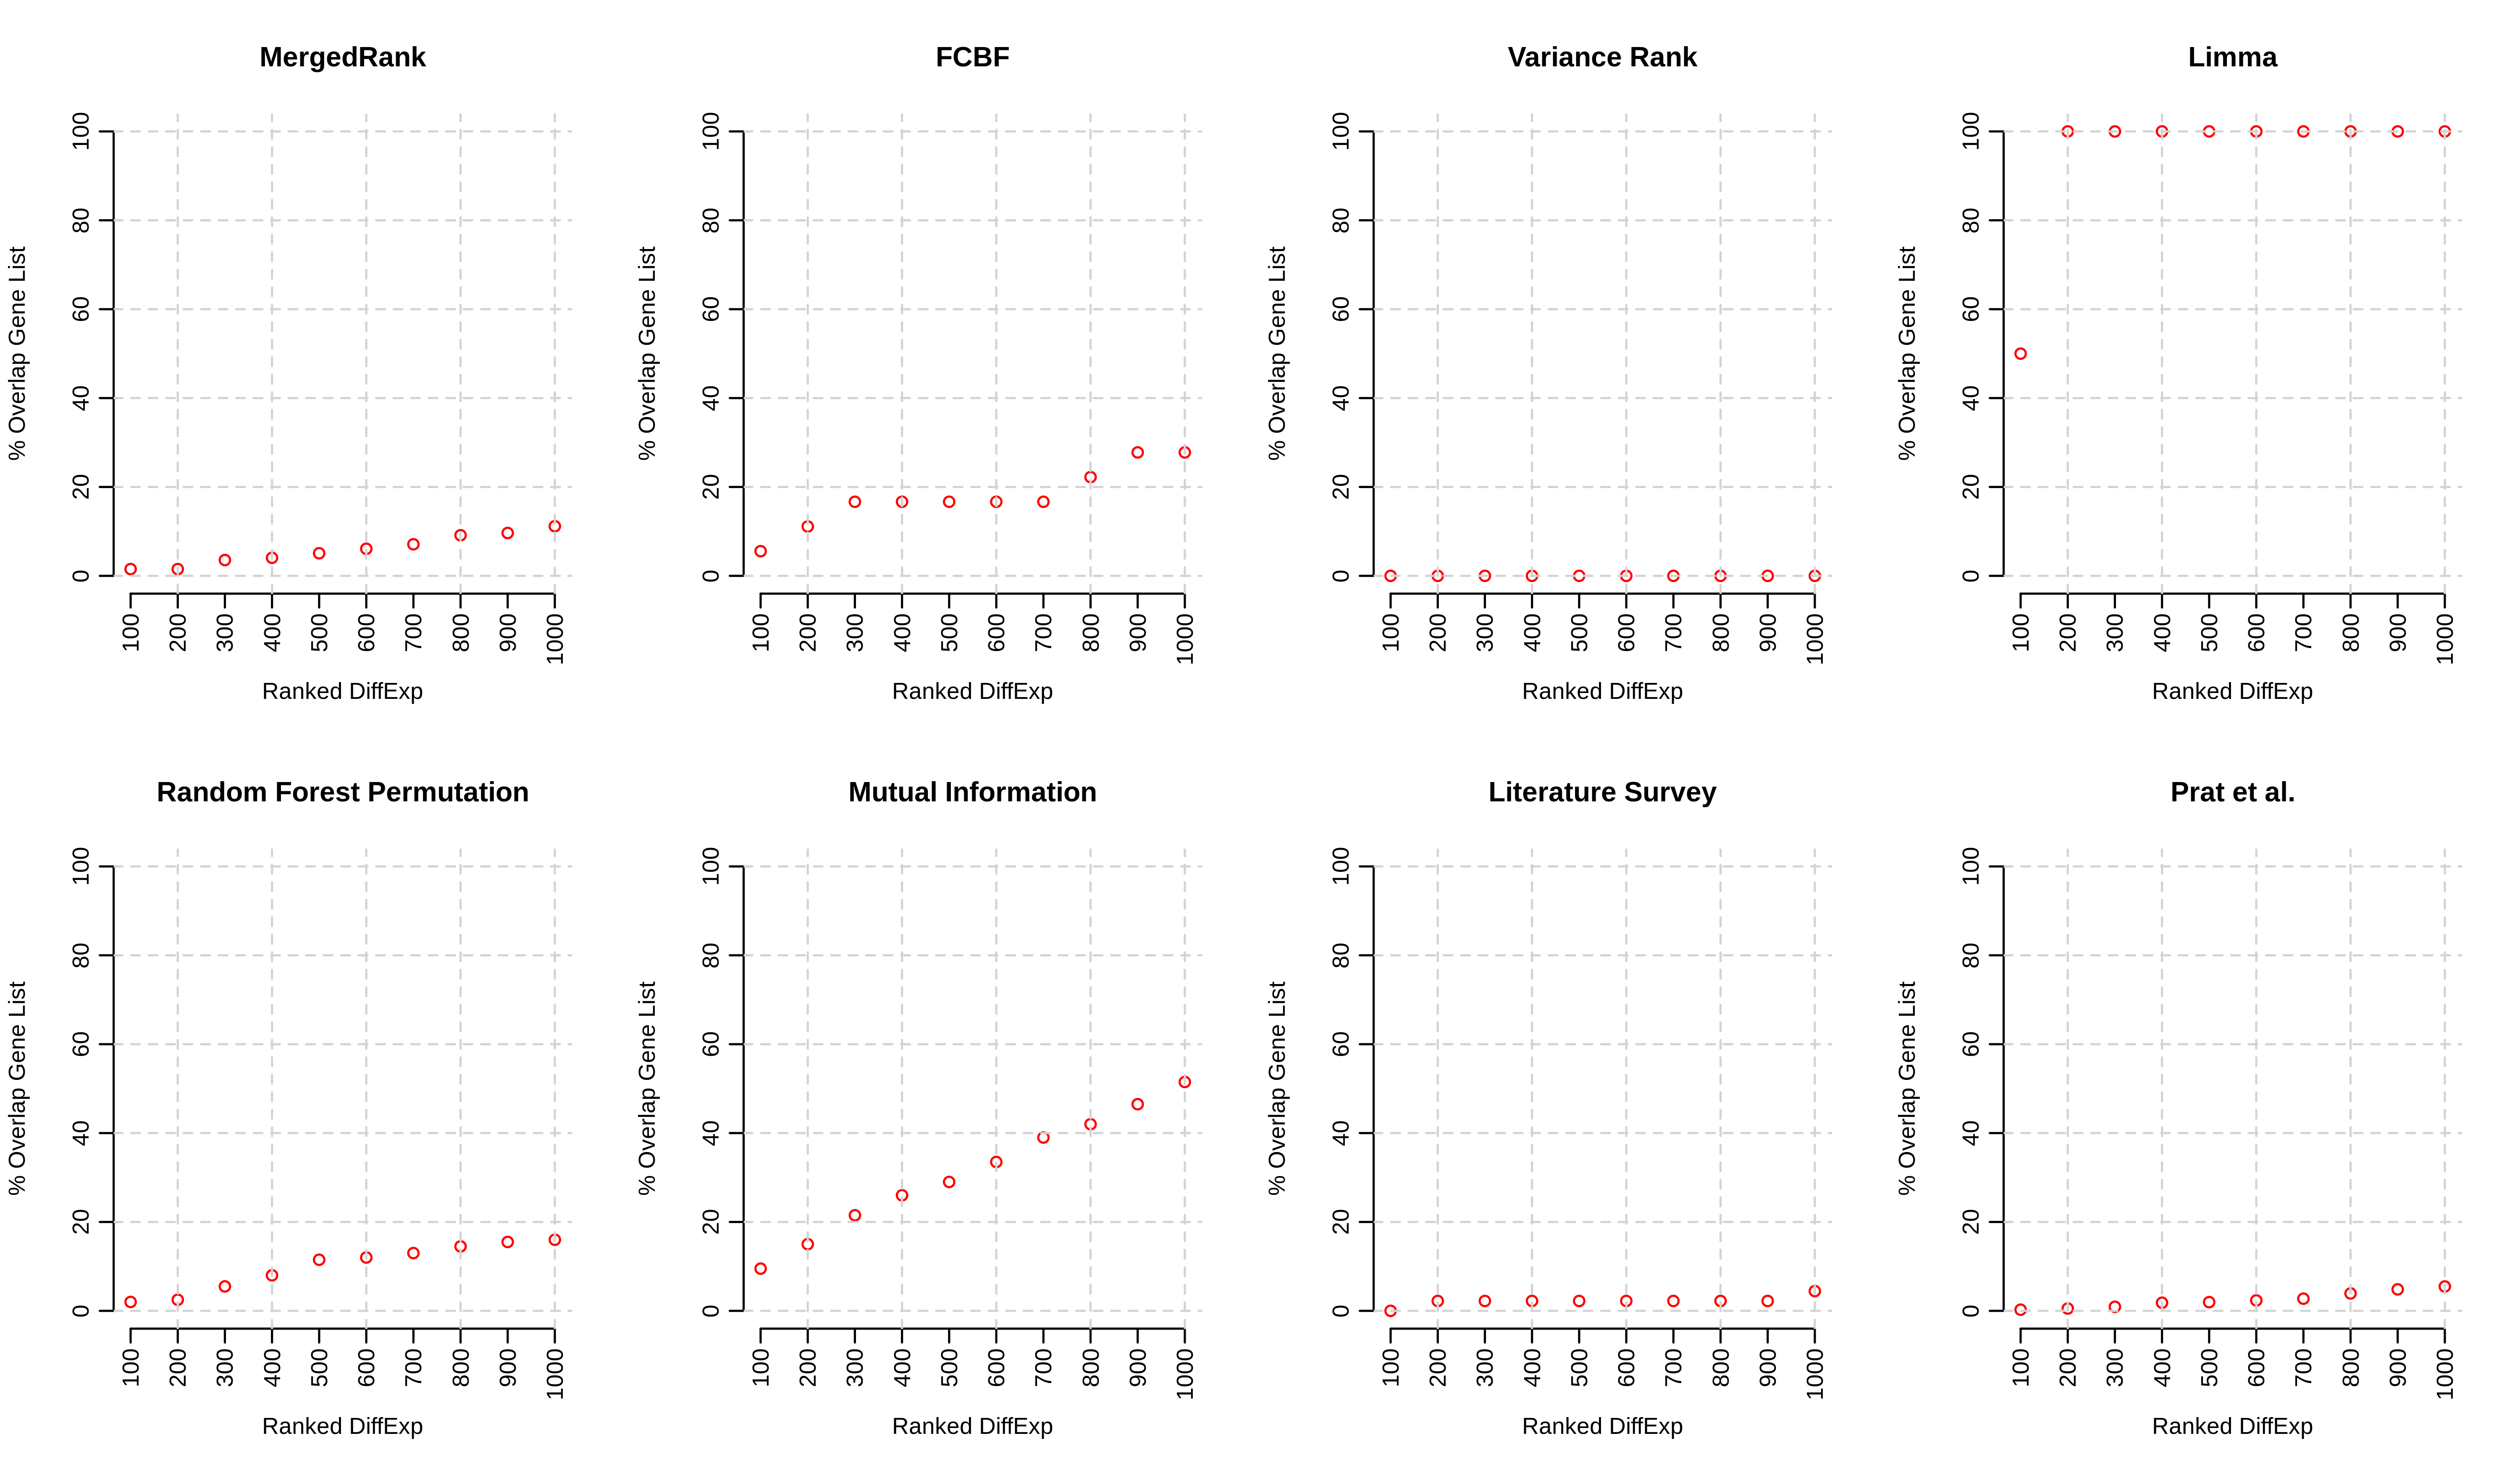

In [39]:
cmn_path <- "/home/jp/ICP_Responders/ML/GideHugoRiaz_AntiPD1/Pre-processingFeatureSelection/"
ord.gl <- rownames(ordered_output)

plot_list <- function(pathRDS = NULL, group = NULL){
                    fbcf.gl <- readRDS(pathRDS)


                    perc.fbcf.gl <- c(length(which(fbcf.gl %in% ord.gl[1:100])),
                                     length(which(fbcf.gl %in% ord.gl[1:200])),
                                     length(which(fbcf.gl %in% ord.gl[1:300])),
                                     length(which(fbcf.gl %in% ord.gl[1:400])),
                                     length(which(fbcf.gl %in% ord.gl[1:500])),
                                     length(which(fbcf.gl %in% ord.gl[1:600])),
                                     length(which(fbcf.gl %in% ord.gl[1:700])),
                                     length(which(fbcf.gl %in% ord.gl[1:800])),
                                     length(which(fbcf.gl %in% ord.gl[1:900])),
                                     length(which(fbcf.gl %in% ord.gl[1:1000]))
                                     )*100/length(fbcf.gl)


                    plot(perc.fbcf.gl, col="red", main=group,
                         axes = FALSE,
                         xlab= "Ranked DiffExp", 
                         ylab = "% Overlap Gene List",
                         ylim=c(0,100))
                    axis(1, at=1:10, labels=c("100","200", "300", "400", "500","600",
                                                           "700", "800", "900","1000"),
                        las=2) 
                    axis(2, at=c(0, 20, 40, 60, 80, 100), labels=c(0, 20, 40, 60, 80, 100))
                    grid(lty="dashed")
                    }

options(repr.plot.height=7, repr.plot.width=12, repr.plot.res=500)
par(mfrow=c(2, 4), mgp=c(3, 0.7, 0))
plot_list(paste0(cmn_path, "liu_ml.list.rds"), "MergedRank")
plot_list(paste0(cmn_path, "liu_fcbf18.list.rds"), "FCBF")
plot_list(paste0(cmn_path, "liu_top200var.list.rds"), "Variance Rank")
plot_list(paste0(cmn_path, "liu_limma200.list.rds"), "Limma")
plot_list(paste0(cmn_path, "liu_ranger.imp200.rds"), "Random Forest Permutation")
plot_list(paste0(cmn_path, "liu_jmim.list.rds"), "Mutual Information")
plot_list(paste0(cmn_path, "litsur.list.rds"), "Literature Survey")
plot_list(paste0(cmn_path, "prat.list.rds"), "Prat et al.")